# Predictions Based on Fourth Year Data

## Dependencies

In [3]:
using DataFrames, DataArrays, Gadfly, Distributions, GLM

In [4]:
set_default_plot_size(985px, 400px);

## Preparing the Data

This data contains all years up to 2014

In [5]:
data = readtable("begfresh2.csv");

Load students that were admitted after 2005 and before 2015.

In [6]:
data = data[data[:ENTRYSEM] .>= 20063, :];

Transform entry year column (ex 20063 to 2006).

In [7]:
data[:ENTRYSEM] .-= 3;
data[:ENTRYSEM] ./= 10;

Convert NA values to 0

In [8]:
data[isna(data[:CUMGPA08]), :CUMGPA08] = 0;
data[isna(data[:CUMHRS08]), :CUMHRS08] = 0;
data[isna(data[:GRAD4]), :GRAD4] = 0;
data[isna(data[:GRAD5]), :GRAD5] = 0;
data[isna(data[:GRAD6]), :GRAD6] = 0;

Number of students:

In [9]:
students = size(data)[1]

32139

## Five Year Graduation Rate

### Training the Probit Model

Using the GLM package, a probit model is trained to give the probability that a student will graduate within four years. The following features are used in this model:
- HSGPASQ
- Whether the student is male
- Eigth semester GPA
- Number of credit hours after the eigth semester
- Number of major changes

In [10]:
training_5year = data[data[:ENTRYSEM] .<= 2010, :];

In [11]:
gradmodel_5years = glm(GRAD5 ~ MALE + HSGPASQ + CUMGPA08 + CUMHRS08 + CHANGE_4, training_5year, Binomial(), ProbitLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Binomial,GLM.ProbitLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}:

Coefficients:
              Estimate   Std.Error  z value Pr(>|z|)
(Intercept)   -3.46062   0.0695162 -49.7815   <1e-99
MALE         -0.215172   0.0262244 -8.20504   <1e-15
HSGPASQ       0.110423  0.00479086  23.0486   <1e-99
CUMGPA08     -0.135684   0.0250891 -5.40808    <1e-7
CUMHRS08     0.0278498 0.000534436  52.1106   <1e-99
CHANGE_4     -0.643711   0.0398896 -16.1373   <1e-57


### Make Predictions Using the Training Model

In [12]:
year = 2006;
years = [];
actual_5year = [];
predicted_5year = [];

for i=1:6
    X = data[data[:ENTRYSEM] .== year, :]
    probs = predict(gradmodel_5years, X)
    push!(predicted_5year, mean(probs)*100)
    year <= 2009 ? push!(actual_5year, mean(X[:GRAD5])*100) : nothing
    push!(years, year)
    year += 1
end

#### RMSE

In [13]:
rmse = sqrt(sum((predicted_5year[1:4]-actual_5year).^2)) / 4

0.7021636996461761

#### Plot

In [14]:
theme_predicted = Theme(default_color=colorant"red")
layer_predicted_5year = layer(x=years, y=predicted_5year, Geom.point, Geom.line, theme_predicted);

In [16]:
theme_actual = Theme(default_color=colorant"blue")
layer_actual_5year = layer(x=years[1:4], y=actual_5year, Geom.point, Geom.line, theme_actual);

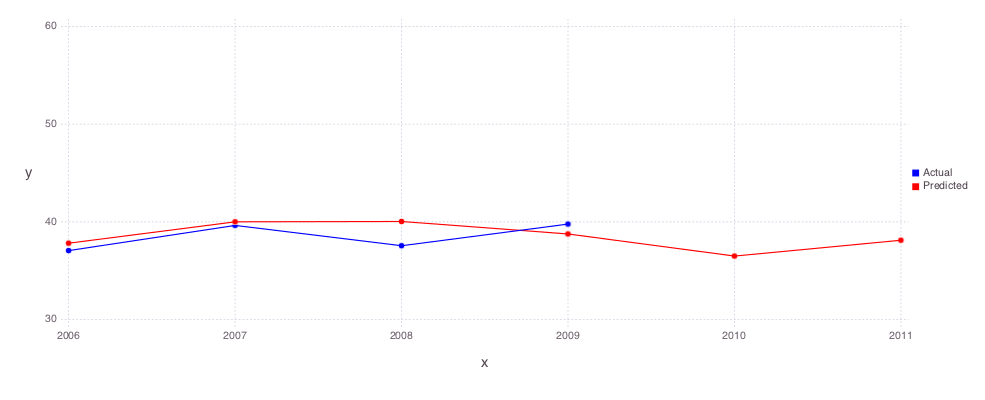

In [17]:
plot(layer_predicted_5year, layer_actual_5year, Coord.Cartesian(ymin=30,ymax=60), 
Guide.manual_color_key("", ["Actual", "Predicted"], ["blue", "red"]))

## Six Year Graduation Rate

### Training the Probit Model

Using the GLM package, a probit model is trained to give the probability that a student will graduate within four years. The following features are used in this model:
- ACTCOMPSQ
- Whether the student is American Indian
- Eigth semester GPA
- Number of credit hours after the eigth semester
- Number of major changes
- FIVE_YR4

In [18]:
training_6year = data[data[:ENTRYSEM] .<= 2009, :];

In [19]:
gradmodel_6years = glm(GRAD6 ~ ACTCOMPSQ + AM_INDIAN + CUMGPA08 + CUMHRS08 + CHANGE_4 + FIVE_YR4, training_6year, Binomial(), ProbitLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Binomial,GLM.ProbitLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}:

Coefficients:
                 Estimate   Std.Error  z value Pr(>|z|)
(Intercept)      -4.50794     0.24246 -18.5925   <1e-76
ACTCOMPSQ    -0.000728342 0.000110191 -6.60982   <1e-10
AM_INDIAN       -0.380657   0.0844574 -4.50709    <1e-5
CUMGPA08         0.706026   0.0628975   11.225   <1e-28
CUMHRS08        0.0236697  0.00153753  15.3946   <1e-52
CHANGE_4         0.266553   0.0540149   4.9348    <1e-6
FIVE_YR4          1.60284    0.159391  10.0561   <1e-23


### Make Predictions Using the Training Model

In [22]:
year = 2006;
years = [];
actual_6year = [];
predicted_6year = [];

for i=1:6
    X = data[data[:ENTRYSEM] .== year, :]
    X = X[!isna(X[:FIVE_YR4]), :]
    probs = predict(gradmodel_6years, X)
    push!(predicted_6year, mean(probs)*100)
    year <= 2008 ? push!(actual_6year, mean(X[:GRAD6])*100) : nothing
    push!(years, year)
    year += 1
end

#### RMSE

In [23]:
rmse = sqrt(sum((predicted_6year[1:3]-actual_6year).^2)) / 3

0.1629986187179943

#### Plot

In [24]:
theme_predicted = Theme(default_color=colorant"red")
layer_predicted_6year = layer(x=years, y=predicted_6year, Geom.point, Geom.line, theme_predicted);

In [25]:
theme_actual = Theme(default_color=colorant"blue")
layer_actual_6year = layer(x=years[1:3], y=actual_6year, Geom.point, Geom.line, theme_actual);

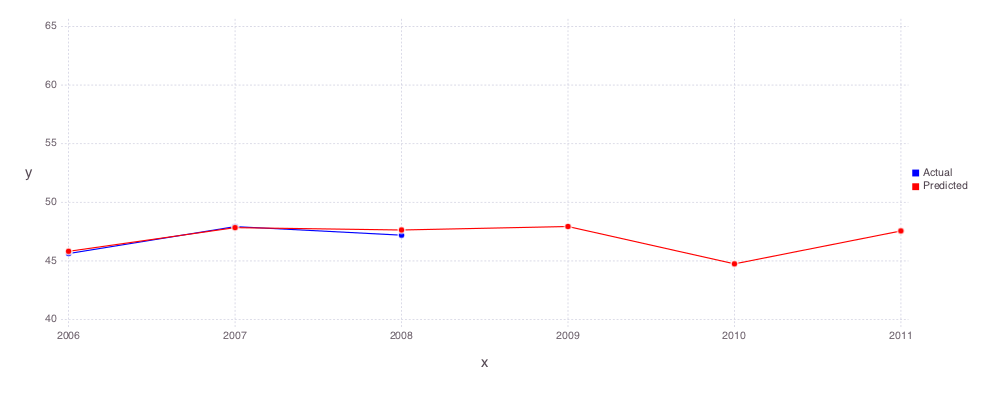

In [26]:
plot(layer_predicted_6year, layer_actual_6year, Coord.Cartesian(ymin=40,ymax=65), 
Guide.manual_color_key("", ["Actual", "Predicted"], ["blue", "red"]))